In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import StratifiedKFold, cross_val_score ,cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import numpy as np

#ignoring warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

read data : 

In [188]:
loan_data = pd.read_csv('/kaggle/input/home-loan-approval/loan_sanction_train.csv')
test_data = pd.read_csv('/kaggle/input/home-loan-approval/loan_sanction_test.csv')

> Take a look at the first columns and rows of our data


In [189]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [190]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


have some initial infos about the trainning data , (types , columns ......)

In [191]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [192]:
df=pd.DataFrame(loan_data)
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [193]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [194]:
df['Self_Employed'] .unique()

array(['No', 'Yes', nan], dtype=object)

In [195]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [196]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

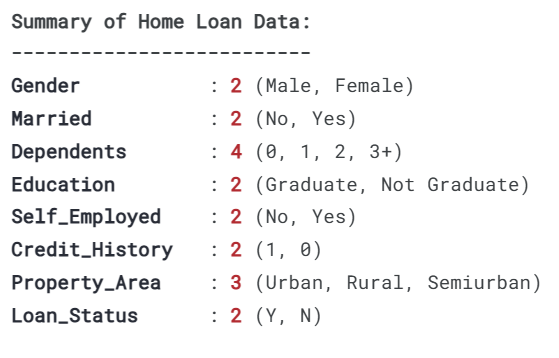

In [197]:
print(df.isna().sum().sort_values())

Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Married               3
Gender               13
Loan_Amount_Term     14
Dependents           15
LoanAmount           22
Self_Employed        32
Credit_History       50
dtype: int64


In [198]:
 df= df.dropna()

In [199]:
 print(df.isna())

     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
1      False   False    False       False      False          False   
2      False   False    False       False      False          False   
3      False   False    False       False      False          False   
4      False   False    False       False      False          False   
5      False   False    False       False      False          False   
..       ...     ...      ...         ...        ...            ...   
609    False   False    False       False      False          False   
610    False   False    False       False      False          False   
611    False   False    False       False      False          False   
612    False   False    False       False      False          False   
613    False   False    False       False      False          False   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1              False              False       False             False   
2

In [200]:
print(df.isna().sum().sort_values())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [201]:
# Grouping and counting
counts = df.groupby(['Education', 'Loan_Status']).size().unstack()

counts.head()

Loan_Status,N,Y
Education,,
Graduate,112,271
Not Graduate,36,61


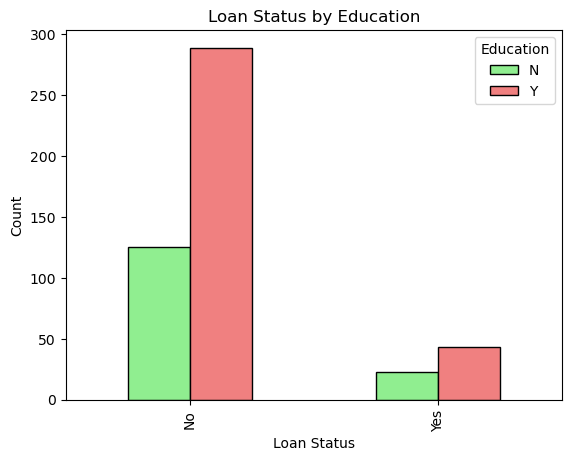

In [214]:
counts.plot(kind='bar',color=["lightgreen", "lightcoral"], edgecolor="black")
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status by Education')
plt.legend(title='Education')

In [203]:
counts = df.groupby(['Gender', 'Loan_Status']).size().unstack()

counts.head()

Loan_Status,N,Y
Gender,,
Female,32,54
Male,116,278


<AxesSubplot:xlabel='Self_Employed'>

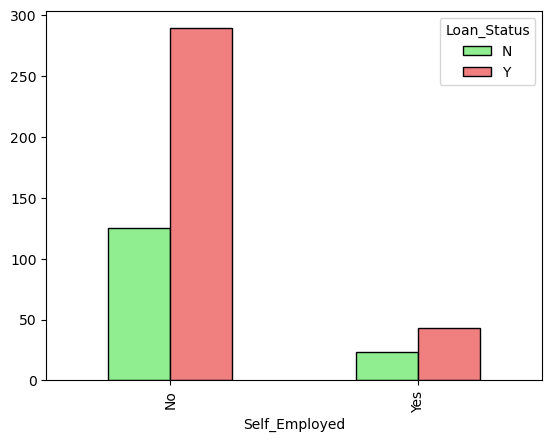

In [215]:
counts.plot(kind ='bar',color=["lightgreen", "lightcoral"], edgecolor="black")

In [205]:
counts = df.groupby(['Self_Employed','Loan_Status']).size().unstack()

counts.head()

Loan_Status,N,Y
Self_Employed,,
No,125,289
Yes,23,43


<AxesSubplot:xlabel='Self_Employed'>

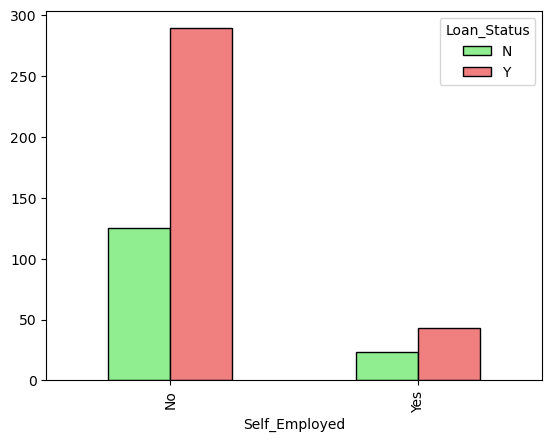

In [217]:
counts.plot(kind ='bar', color=["lightgreen", "lightcoral"], edgecolor="black")

**observation**                 ###  i can see that : The approvement rate is always higher than the non approved . 
                                    Features are similar in the Loan status 
                                      No significant change

<AxesSubplot:xlabel='Property_Area'>

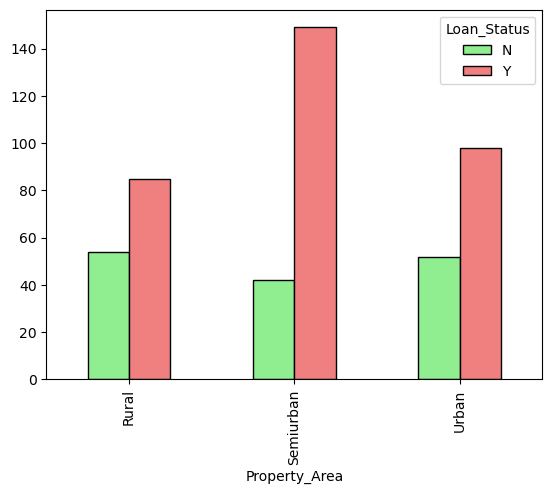

In [218]:

loan_status_counts = df.groupby(['Property_Area', 'Loan_Status']).size().unstack()
loan_status_counts.plot(kind='bar',color=["lightgreen", "lightcoral"], edgecolor="black")

**Observation2**
: semi-Urban araeas :
                   approvale rate is the highest and  the non approval is lowest

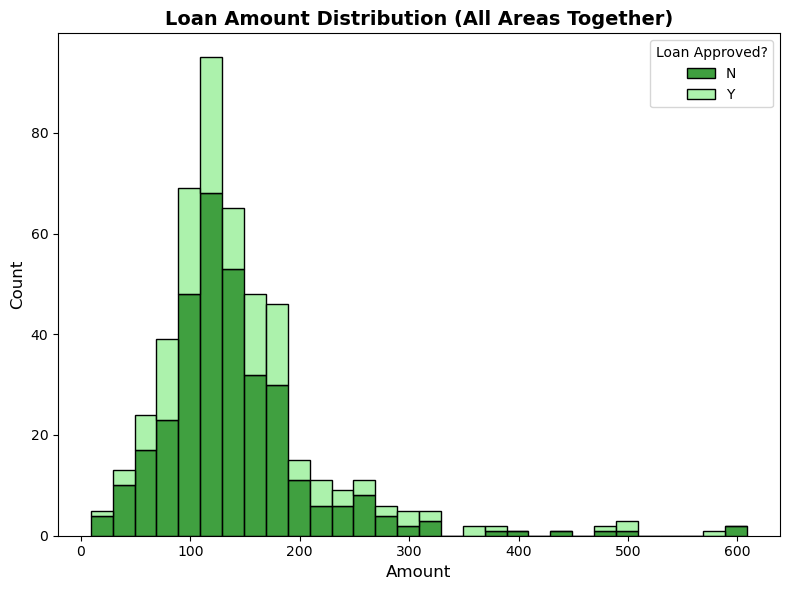

In [208]:
# Drop rows with missing LoanAmount
rf = df.dropna(subset=["LoanAmount"])

# Set up the plot
plt.figure(figsize=(8, 6))
sns.histplot(
    data=df,
    x="LoanAmount",
    hue="Loan_Status",
    multiple="stack",
    kde=False,
    palette={"N": "lightgreen", "Y": "green"},
    binwidth=20,
)

# Add titles and labels
plt.title("Loan Amount Distribution (All Areas Together)", fontsize=14, fontweight="bold")
plt.xlabel("Amount", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Loan Approved?", labels=["N", "Y"], loc="upper right")
plt.tight_layout()

# Show the plot
plt.show()

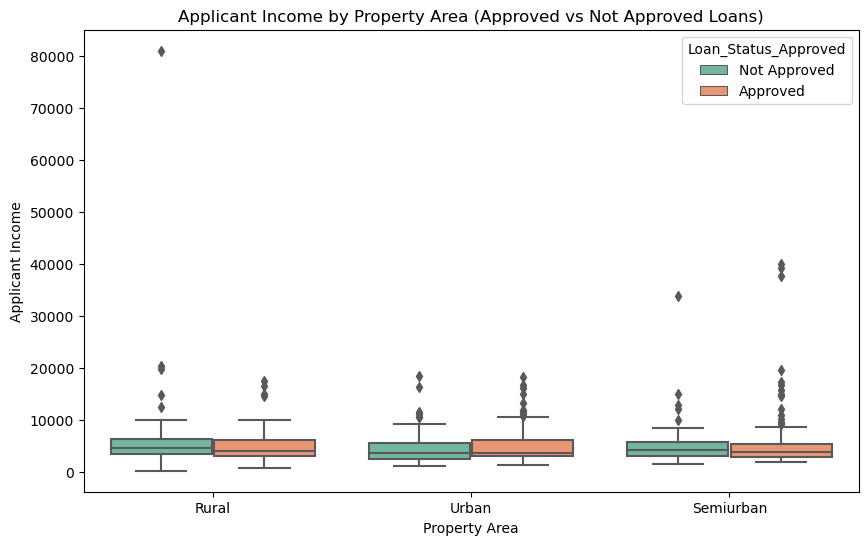

In [209]:
# Add a new column to indicate loan status
df['Loan_Status_Approved'] = df['Loan_Status'].apply(lambda x: 'Approved' if x == 'Y' else 'Not Approved')

# Plot both on the same box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Property_Area', y='ApplicantIncome', hue='Loan_Status_Approved', data=df, palette='Set2')

plt.title('Applicant Income by Property Area (Approved vs Not Approved Loans)')
plt.xlabel('Property Area')
plt.ylabel('Applicant Income')
plt.show()

observation3 : We can see that the income in semi urban is higher 
               Let s move to the loan History

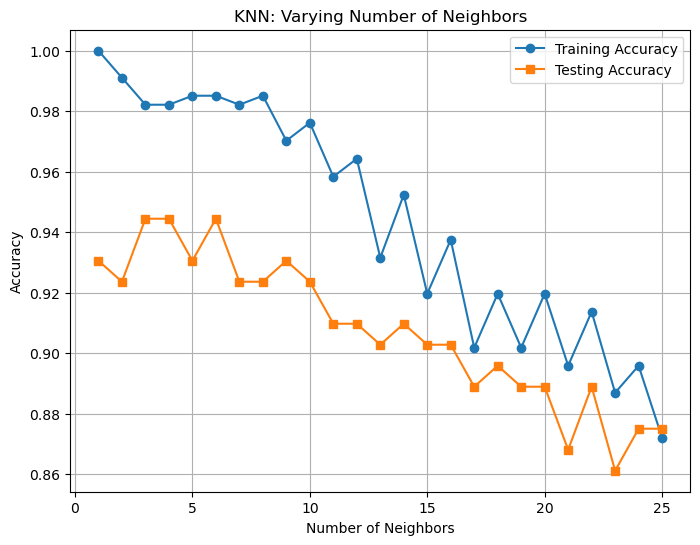

In [210]:


df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop('Loan_Status', axis=1)
y = df_encoded['Loan_Status']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=21, stratify=y)

# Initialize dictionaries for accuracies
train_accuracies = {}
test_accuracies = {}

# Loop through different values of k (number of neighbors)
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    # Create a k-NN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    
    # Calculate and store accuracies
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

# Plot the results
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy", marker='o')
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy", marker='s')
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.grid(True)

In [211]:
# Select optimal k (e.g., k = 5)
optimal_k = 4
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[40  4]
 [ 4 96]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        44
           1       0.96      0.96      0.96       100

    accuracy                           0.94       144
   macro avg       0.93      0.93      0.93       144
weighted avg       0.94      0.94      0.94       144



In [212]:
k = 4 # Optimal k from previous analysis
knn = KNeighborsClassifier(n_neighbors=k)

# Perform Stratified K-Fold Cross-Validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=21)
# Cross-validation accuracy scores
cv_scores = cross_val_score(knn, X_scaled, y, cv=stratified_kfold, scoring='accuracy')

# Print results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")

Cross-Validation Scores: [0.98958333 0.96875    0.95833333 0.95833333 0.95833333]
Mean CV Accuracy: 0.97


In [213]:
y_pred = cross_val_predict(knn, X_scaled, y, cv=stratified_kfold)

# Calculate confusion matrix
cm = confusion_matrix(y, y_pred)

print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[141   7]
 [  9 323]]


If loan approval is a high-stakes decision, you may want to further reduce false positives (FP) even at the cost of slightly higher false negatives (FN).
Business-specific thresholds or cost considerations for errors should guide the final evaluation.